<a href="https://colab.research.google.com/github/PALANIVELAADHI/mechine-and-deep-learning/blob/master/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://medium.com/capital-one-tech/random-forest-algorithm-for-machine-learning-c4b2c8cc9feb#:~:text=When%20using%20the%20Random%20Forest,better%20decision%20for%20your%20forest.
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
#np.random.seed(42)

# Load dataset
data = pd.read_csv("D:\\Hands_on_new\\demo2\\diabetes.csv")

# show sample of the dataset
data.sample(5)



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
459,9,134,74,33,60,25.9,0.460,81,0
247,0,165,90,33,680,52.3,0.427,23,0
360,5,189,64,33,325,31.2,0.583,29,1
565,2,95,54,14,88,26.1,0.748,22,0
388,5,144,82,26,285,32.0,0.452,58,1


In [ ]:
# show columns
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'class'],
      dtype='object')

In [ ]:
# split data into input and taget variable(s)

X = data.drop("class", axis=1)
y = data["class"]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [ ]:
# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
)

In [ ]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# predictin on the test set
y_pred = classifier.predict(X_test)

In [ ]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8181818181818182


In [ ]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
1,Glucose,0.260424
5,BMI,0.151931
7,Age,0.134769
6,DiabetesPedigreeFunction,0.129990
2,BloodPressure,0.085764
0,Pregnancies,0.081865
4,Insulin,0.080296
3,SkinThickness,0.074960


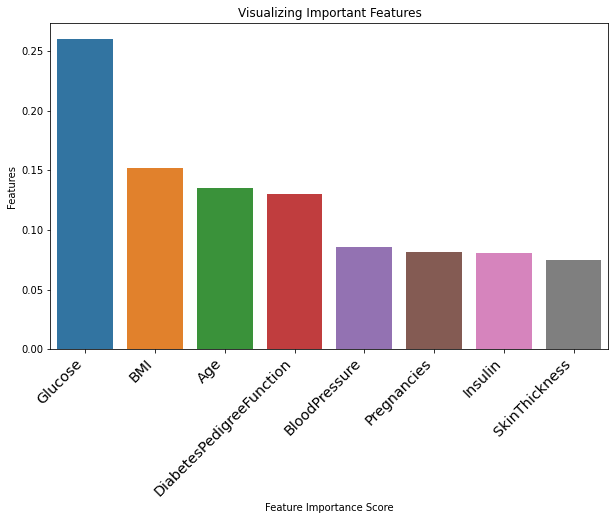

In [ ]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
plt.show()

In [ ]:
# load data with selected features
X = data.drop(["class", "SkinThickness"], axis=1)
y = data["class"]

# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
)

In [ ]:
# Create a Random Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# prediction on test set
y_pred = clf.predict(X_test)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8181818181818182
